In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from material_models import GOH_fullyinc
from misc import preprocessing, normalization, predict
import tensorflow as tf
import pickle
fsize=5
pltparams = {'legend.fontsize': 'large',
          'figure.figsize': (fsize*5,fsize),
          'font.size'     : 4*fsize,
          'axes.labelsize': 4*fsize,
          'axes.titlesize': 4*fsize,
          'xtick.labelsize': 3.5*fsize,
          'ytick.labelsize': 3.5*fsize,
          'lines.linewidth': 5,
          'lines.markersize': 10,
          'lines.markeredgewidth': 2,
          'axes.titlepad': 25,
          "mathtext.fontset": 'dejavuserif',
          'axes.labelpad': 5}
plt.rcParams.update(pltparams)
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.inferno(np.linspace(0.1, 0.7, 2)))
import pandas as pd

In [ ]:
samples = ['S111S1', 'S111S4', 'S112S2', 'S112S3', 'S112S4', 'S113S3', 'S113S4', 'S143S1', 'S143S2', 'S144S3', 'S144S4']
limits = [[0, 183, 2*183, 3*183], [0, 184, 367, 3*183], [0, 184, 367, 3*183], [0, 183, 366, 3*183], [0, 184, 367, 3*183], [0, 183, 366, 3*183], 
            [0, 183, 366, 3*183], [0, 62, 121, 3*183], [0, 62, 123, 3*183], [0, 62, 123, 3*183], [0, 62, 123, 3*183]]
lim = [0, 62, 123, 3*183]
data = model+'b'
ndata, I1, I2, I4a, I4s, Psi_gt, X, Y, sigma_gt, F, C, C_inv  = preprocessing(data)
sigma_pr, _, _, _, _, _ = predict(model, data, False)

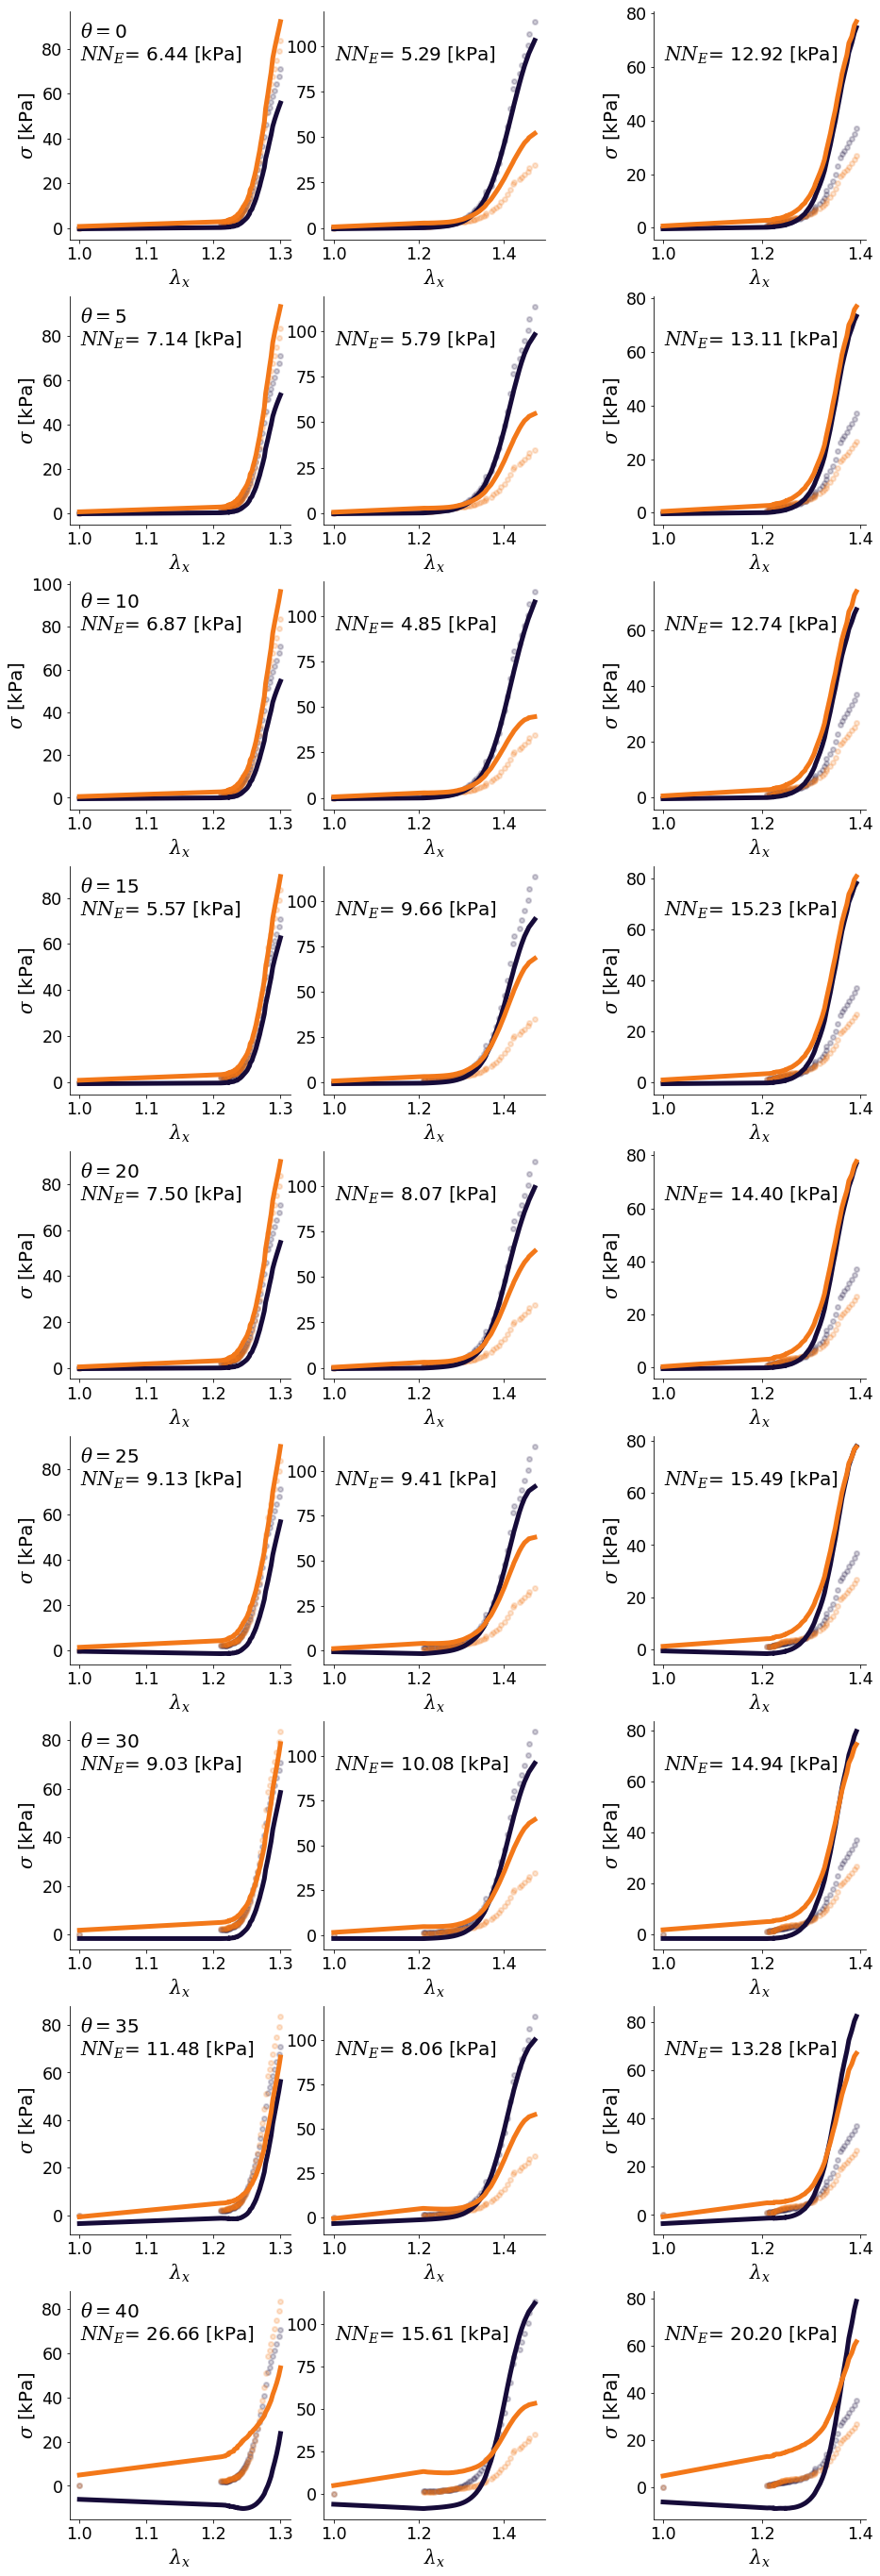

In [9]:
lim = [0, 62, 123, 3*183]
fig = plt.figure(figsize=(20,60))
gs1 = fig.add_gridspec(11,2, wspace=0.15, hspace=0.25, left = 0.05, right = 0.4) #nrows, ncols
gs2 = fig.add_gridspec(11,2, wspace=0.3, hspace=0.25, left = 0.48, right = 0.84)

for a in range(0,9,1):
    theta = a*5
    model = 'S144S3_xy_theta_'+str(theta)
    data = 'S144S3_xyb'
    ndata, I1, I2, I4a, I4s, Psi_gt, X, Y, sigma_gt, F, C, C_inv  = preprocessing(data)
    sigma_pr, _, _, _, _, _ = predict(model, data, True)
    
    error = np.zeros(sigma_gt.shape[0])
    for i in range(sigma_gt.shape[0]):
        for j in range(3):
            for k in range(3):
                error[i]+= (sigma_gt[i,k,j] - sigma_pr[i,k,j])**2
        error[i] = np.sqrt(error[i])
    error = error*1000 #MPa -> kPa
    offx_error = np.mean(error[:lim[1]])
    offy_error = np.mean(error[lim[1]:lim[2]])
    equi_error = np.mean(error[lim[2]:lim[3]])

    ax1 = fig.add_subplot(gs1[a,0])
    ax2 = fig.add_subplot(gs1[a,1])
    ax3 = fig.add_subplot(gs2[a,0])

    text1 = '$\\theta = $'+str(theta)
    ax1.text(0.05,0.95, text1, transform=ax1.transAxes, va='top')
    axes = [ax1, ax2, ax3]
    errs = [offx_error, offy_error, equi_error]
    for i, (ax, err) in enumerate(zip(axes, errs)):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set(xlabel = '$\\lambda_x$')
        errtext = '$NN_E$= %.2f [kPa]' %err
        ax.text(0.05,0.85, errtext, transform=ax.transAxes, va='top')

        i1 = lim[i]
        i2 = lim[i+1]
        ax.plot(X[i1:i2,0], sigma_gt[i1:i2,0,0]*1000,'.', alpha=0.2, label='$\\sigma_x$ (Exp.)')
        ax.plot(X[i1:i2,0], sigma_gt[i1:i2,1,1]*1000,'.', alpha=0.2, label='$\\sigma_y$ (Exp.)')

        ax.plot(X[i1:i2,0], sigma_pr[i1:i2,0,0]*1000, label='$\\sigma_x$ (DNN)')
        ax.plot(X[i1:i2,0], sigma_pr[i1:i2,1,1]*1000, label='$\\sigma_y$ (DNN)')

    ax1.set(ylabel = '$\\sigma$ [kPa]')
    ax3.set(ylabel = '$\\sigma$ [kPa]')
fig.savefig('figs/S144S3_xy_theta.jpg', dpi=300, bbox_inches='tight')